In [1]:
import sys
sys.path.append('../')

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy

In [3]:
from LooselySymmetricNN import LooselySymmetricNN
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from random import seed

## Load data

In [4]:
mails_dir = "../datasets"
data = pd.read_csv('../datasets/breast-cancer-wisconsin-w.csv') 
X = data.values[:, 1:10]
y = data.values[:, 10]

In [5]:
data.head()

,sample_id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   sample_id                     683 non-null    int64
 1   clump_thickness               683 non-null    int64
 2    uniformity_cell_size         683 non-null    int64
 3    uniformity_cell_shape        683 non-null    int64
 4    marginal_adhesion            683 non-null    int64
 5    single_epithelial_cell_size  683 non-null    int64
 6    bare_nuclei                  683 non-null    int64
 7    bland_chromatin              683 non-null    int64
 8    normal_nucleoli              683 non-null    int64
 9    mitoses                      683 non-null    int64
 10   class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
data.describe()

,sample_id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
print(X[0])

[5 1 1 1 2 1 3 1 1]


In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
print(y[1])

0


In [11]:
results = {
    "none": {
            "accuracy_score": [],
            "f1_score": [],
            "precision_score": [],
            "recall_score": []
    },
    "save_node_unified": {
            "accuracy_score": [],
            "f1_score": [],
            "precision_score": [],
            "recall_score": []
    }
}

In [12]:
seed(15)

In [13]:
X_new = copy.copy(X)
y_new = copy.copy(y)
X_new, y_new = shuffle(X_new, y_new)

In [14]:
kf = KFold(n_splits=10)

In [15]:
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y_new[train_index], y_new[test_index]
    for model in results:
        nn = LooselySymmetricNN(n_input=X_train.shape[1], n_hidden=30, epochs=100, enhancement=0.1, alpha=0.3, enhancement_type=model)
        nn.fit(X_train, y_train)
        y = nn.predict(X_test)
        
        results[model]["accuracy_score"].append(nn.accuracy_score(y_test, y) * 100)
        results[model]["f1_score"].append(nn.f1_score(y_test, y) * 100)
        results[model]["precision_score"].append(nn.precision_score(y_test, y) * 100)
        results[model]["recall_score"].append(nn.recall_score(y_test, y) * 100)

## Graph

In [16]:
folds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

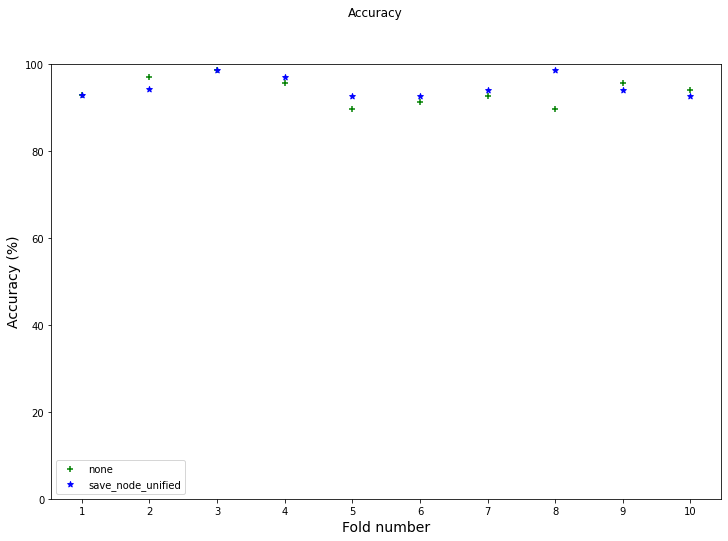

In [17]:
fig, axes = plt.subplots(1, sharex=True, figsize=(12, 8))
fig.suptitle('Accuracy')

axes.set_ylabel("Accuracy (%)", fontsize=14)
axes.set_xlabel("Fold number", fontsize=14)
plt.ylim([0, 100])
plt.xticks(folds)

axes.scatter(folds, results["none"]["accuracy_score"], marker="+", color="g", label="none")
axes.scatter(folds, results["save_node_unified"]["accuracy_score"], marker="*", color="b", label="save_node_unified")

axes.legend()

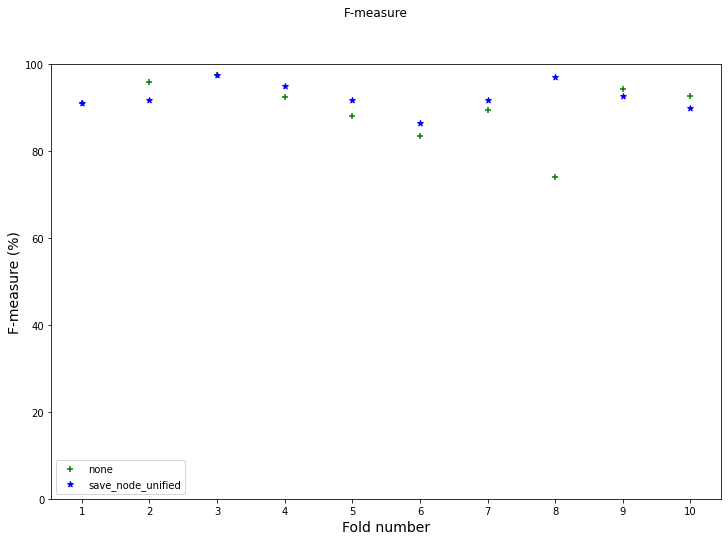

In [18]:
fig, axes = plt.subplots(1, sharex=True, figsize=(12, 8))
fig.suptitle('F-measure')

axes.set_ylabel("F-measure (%)", fontsize=14)
axes.set_xlabel("Fold number", fontsize=14)
plt.ylim([0, 100])
plt.xticks(folds)

axes.scatter(folds, results["none"]["f1_score"], marker="+", color="g", label="none")
axes.scatter(folds, results["save_node_unified"]["f1_score"], marker="*", color="b", label="save_node_unified")

axes.legend()

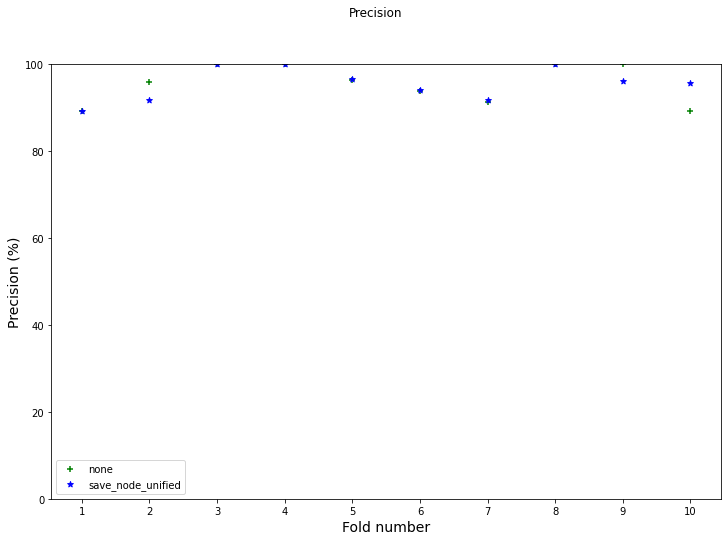

In [19]:
fig, axes = plt.subplots(1, sharex=True, figsize=(12, 8))
fig.suptitle('Precision')

axes.set_ylabel("Precision (%)", fontsize=14)
axes.set_xlabel("Fold number", fontsize=14)
plt.ylim([0, 100])
plt.xticks(folds)

axes.scatter(folds, results["none"]["precision_score"], marker="+", color="g", label="none")
axes.scatter(folds, results["save_node_unified"]["precision_score"], marker="*", color="b", label="save_node_unified")

axes.legend()

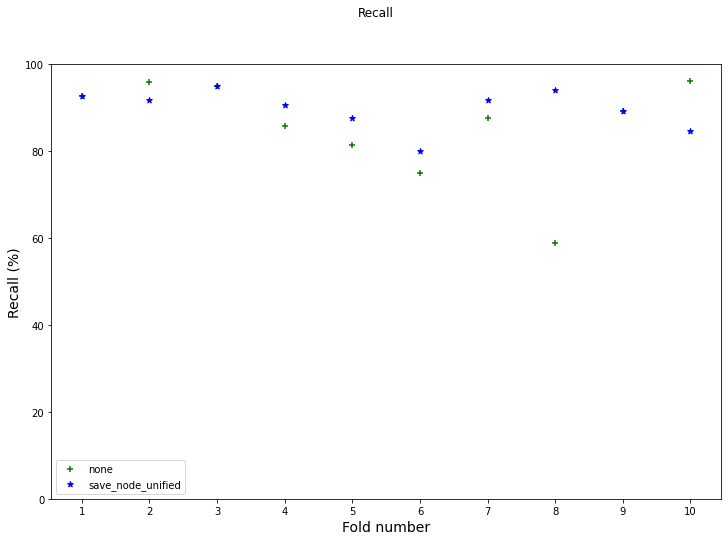

In [20]:
fig, axes = plt.subplots(1, sharex=True, figsize=(12, 8))
fig.suptitle('Recall')

axes.set_ylabel("Recall (%)", fontsize=14)
axes.set_xlabel("Fold number", fontsize=14)
plt.ylim([0, 100])
plt.xticks(folds)

axes.scatter(folds, results["none"]["recall_score"], marker="+", color="g", label="none")
axes.scatter(folds, results["save_node_unified"]["recall_score"], marker="*", color="b", label="save_node_unified")

axes.legend()